In [1]:
import pandas as pd   #import things
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import glob    #import more things
import os
from shutil import copyfile

In [3]:
df = pd.concat([pd.read_csv(f, sep='\\s+', header=1) for f in glob.glob('*/score.sc')], ignore_index = True)
#this line imports the rosetta scores into the df variable

In [4]:
print(df) #print the rosetta scores with this format

       SCORE:  total_score  DEE_total_energy  DEH_total_energy  \
0      SCORE:     -902.071           -33.606            -7.388   
1      SCORE:     -912.077           -38.940            -6.614   
2      SCORE:     -905.625           -41.473            -7.181   
3      SCORE:     -906.437           -40.631            -6.123   
4      SCORE:     -913.513           -40.989            -7.280   
...       ...          ...               ...               ...   
14725  SCORE:     -900.035           -34.062            -4.868   
14726  SCORE:     -901.873           -34.679            -4.695   
14727  SCORE:     -896.066           -34.299            -4.785   
14728  SCORE:     -895.064           -34.655            -5.442   
14729  SCORE:     -901.089           -35.339            -5.489   

       angle_constraint  atom_pair_constraint  dihedral_constraint  dslf_fa13  \
0                   0.0                 1.113                0.404        0.0   
1                   0.0                 0.265

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


25.086365512559404


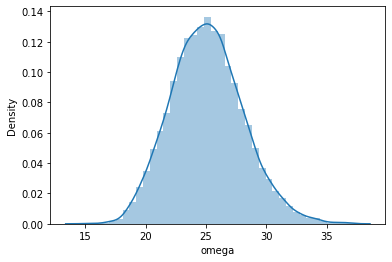

In [5]:
sns.distplot(df["omega"], bins=40)   #extract omega score data (omega bond angle) and analyse it
print(df['omega'].mean())  #output the graph and calculate mean

4.550237542430414


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


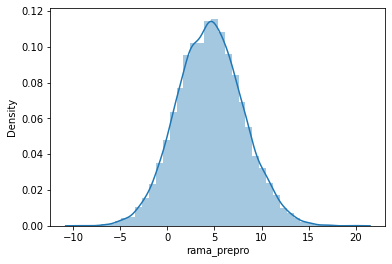

In [6]:
sns.distplot(df["rama_prepro"], bins=40)  #extract rama_prepro data and analyse it
print(df['rama_prepro'].mean()) #output graph and calculate mean

-136.5646289884589


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


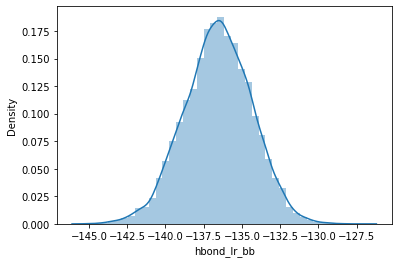

In [7]:
sns.distplot(df["hbond_lr_bb"], bins=40)   #extract long-distance H-bond data and analyse it
print(df['hbond_lr_bb'].mean())  #, output graph and calculate mean

In [12]:
dpicked = df.loc[(df['hbond_lr_bb'] < -132.0) & (df['omega'] < 24.0)] #use the calculated means as a cuttoff for all the structures
dpicked.shape

(5418, 31)

In [13]:
for model in dpicked.description:
    folder_id = '_'.join(model.split('_')[:-1])
    parent = folder_id + "/" + folder_id + ".pdb"
    source = str(folder_id) + "/" + model + ".pdb"
    target_model = "../networks_analysis/" + model + ".pdb"   #export the structures above the cutoff into the 
    target_parent = "../networks_analysis/" + folder_id + ".pdb"  #network analysis folder
    copyfile(source, target_model)
    copyfile(parent, target_parent)